In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Load the dataset
data = pd.read_csv('Survey data _Customer comments.csv')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each comment
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    # Determine sentiment based on compound score
    if sentiment_scores['compound'] <= -0.1:  # Example threshold
        return 'negative'
    elif sentiment_scores['compound'] >= 0.1:
        return 'positive'
    else:
        return 'neutral'

data['sentiment'] = data['verbatim_text'].apply(analyze_sentiment)

# Define a threshold for sentiment classification
threshold = -0.1  # Example threshold

# Create a binary column for identifying complaints (1) and non-complaints (0)
data['is_complaint'] = data['sentiment'].apply(lambda x: 1 if x == 'negative' else 0)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data.head()

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiment,is_complaint
0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,negative,1
1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,neutral,0
2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,neutral,0
3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,negative,1
4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,neutral,0


In [ ]:
import pandas as pd
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
# Filter the dataset to include only complaint comments
complaint_data = data[data['is_complaint'] == 1]

# Preprocessing
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()
    text = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in text if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

complaint_data['preprocessed_text'] = complaint_data['verbatim_text'].apply(preprocess_text)

# Create a dictionary and corpus
dictionary = Dictionary(complaint_data['preprocessed_text'])
corpus = [dictionary.doc2bow(text) for text in complaint_data['preprocessed_text']]

# Apply LDA
num_topics = 5  # Adjust based on your data and domain knowledge
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-21-af4d4911c184>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaint_data['preprocessed_text'] = complaint_data['verbatim_text'].apply(preprocess_text)


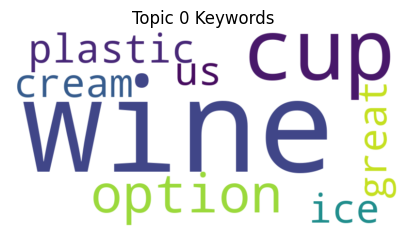

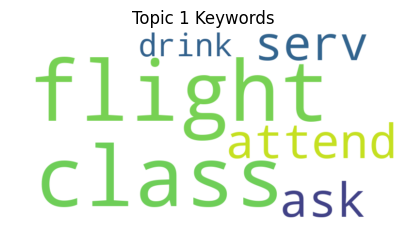

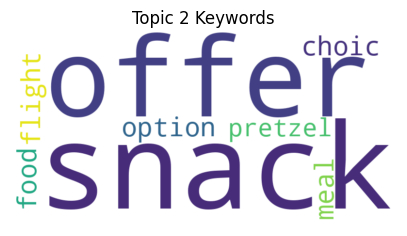

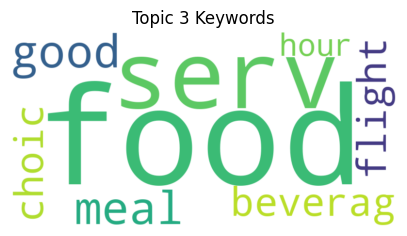

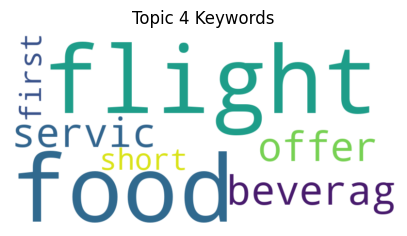

In [ ]:
import matplotlib.pyplot as plt
# Generate word clouds for each topic
for idx, topic in lda_model.print_topics(-1):
    words = topic.split('"')[1::2]  # Extract keywords
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

    plt.figure(figsize=(5, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {idx} Keywords")
    plt.show()